<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

---

**Warning:** This notebook uses `statsmodels` instead of `sklearn`. `statsmodels` is designed with more of a statistics perspective in mind, rather than the machine learning perspective at work in `sklearn`. `statsmodels` is a good library that is worth learning, but it will not appear in the lessons for this course. As a result, this lesson is more of a supplement to the main lesson than a review.

In [27]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [28]:
my_dict = {
    'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ],
    'Y': [.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]
}

my_dict

{'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Y': [0.5, 0.7, 0.8, 0.99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [29]:
pre_df = pd.DataFrame(my_dict)

### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [30]:
x_series = pre_df['X'] + 10
y_series = pre_df['Y'] + 3

new_data = pd.DataFrame(list(zip(x_series,y_series)), columns = ['X','Y'])
new_data

,X,Y
0,11,3.50
1,12,3.70
2,13,3.80
3,14,3.99
4,15,4.00
5,16,4.40
6,17,4.80
7,18,5.10
8,19,5.40
9,20,5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [31]:
df = pd.concat([pre_df,new_data], ignore_index = True)
df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

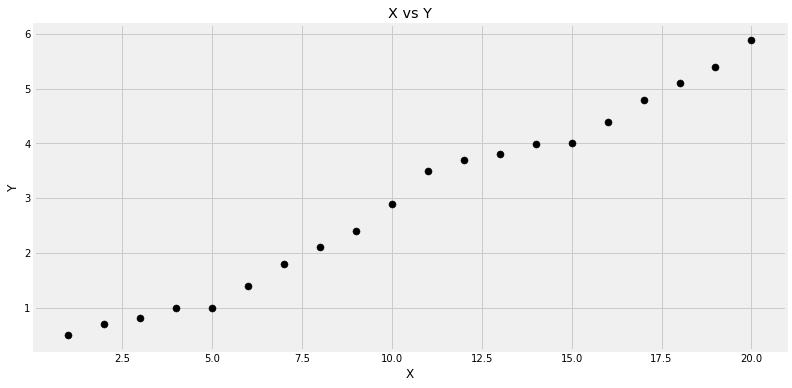

In [32]:
df.plot(x='X', y='Y', kind='scatter', color='black', \
        figsize=(12,6), title='X vs Y', s=50)

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [33]:
import statsmodels.api as sm
Y=df.Y
X=df.X
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1271.
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           3.76e-18
Time:                        21:20:35   Log-Likelihood:                 3.9145
No. Observations:                  20   AIC:                            -3.829
Df Residuals:                      18   BIC:                            -1.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0857      0.097     -0.880      0.391      -0.290       0.119
X              0.2900      0.008     35.655      0.000       0.273       0.307
==============================================================================
Omnibus:                        0.496   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.601
Skew:                           0.249   Prob(JB):                        0.740
Kurtosis:                       2.312   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [34]:
results.rsquared

0.9860390205423032

### What is the p-value for your X?

In [35]:
results.t_test([0, 1]).pvalue

array(3.76065944e-18)

### What is the intercept?

In [36]:
results.params[0]

-0.08568421052631714

### Using the above, write the equation for our model

In [37]:
# Y = -0.0857 + 0.29*X

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [38]:
.29 * 20 - .0857

5.7143

In [39]:
-.0857 + .29 * 21

6.0043

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [40]:
xlist = [20,21]
Xlist = sm.add_constant(xlist)

results.predict(Xlist)

array([5.71371429, 6.00368421])

### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [41]:
y_hat = results.predict(X)
sum(np.square(y_hat - df['Y']))

0.7916793984962407

### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

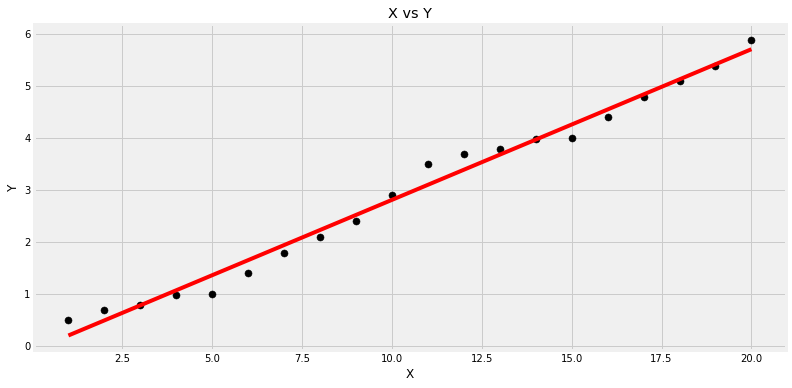

In [42]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(df['X'],df['Y'], color = 'black', s=50)
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(df['X'], y_hat, color='r');

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)

In [44]:
poly_feats = poly.fit_transform(df[['X']])
poly_X = pd.DataFrame(poly_feats)

In [45]:
pdf = pd.merge(df[['Y']],poly_X, right_index=True, left_index=True)
pdf

,Y,0,1,2,3,4,5
0,0.50,1.0,1.0,1.0,1.0,1.0,1.0
1,0.70,1.0,2.0,4.0,8.0,16.0,32.0
2,0.80,1.0,3.0,9.0,27.0,81.0,243.0
3,0.99,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.00,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.40,1.0,6.0,36.0,216.0,1296.0,7776.0
6,1.80,1.0,7.0,49.0,343.0,2401.0,16807.0
7,2.10,1.0,8.0,64.0,512.0,4096.0,32768.0
8,2.40,1.0,9.0,81.0,729.0,6561.0,59049.0
9,2.90,1.0,10.0,100.0,1000.0,10000.0,100000.0


### Using statsmodels as before, fit this new model and save it as poly_results

In [46]:
X = pdf[[0,1,2,3,4,5]]
X = sm.add_constant(X)
y = pdf['Y']

lm = sm.OLS(y, X)
poly_results = lm.fit()
poly_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     572.4
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           1.15e-15
Time:                        21:20:36   Log-Likelihood:                 14.451
No. Observations:                  20   AIC:                            -16.90
Df Residuals:                      14   BIC:                            -10.93
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.5702      0.312      1.827      0.089      -0.099       1.240
1             -0.0104      0.274     -0.038      0.970      -0.598       0.577
2              0.0099      0.076      0.130      0.898      -0.153       0.173
3              0.0054      0.009      0.600      0.558      -0.014       0.024
4             -0.0005      0.000     -1.136      0.275      -0.002       0.000
5           1.347e-05    8.8e-06      1.531      0.148    -5.4e-06    3.23e-05
==============================================================================
Omnibus:                        0.659   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.027
Skew:                           0.004   Prob(JB):                        0.987
Kurtosis:                       3.179   Cond. No.                     1.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Print out the model's predictions and save them as poly_yhat

In [47]:
poly_yhat = poly_results.predict(X)
poly_yhat

0     0.574523
1     0.623835
2     0.733296
3     0.908667
4     1.147914
5     1.442831
6     1.780648
7     2.145656
8     2.520816
9     2.889383
10    3.236515
11    3.550897
12    3.826352
13    4.063459
14    4.271173
15    4.468436
16    4.685798
17    4.967031
18    5.370749
19    5.972018
dtype: float64

### Calculate the SSE

In [48]:
sum(np.square(poly_yhat - pdf['Y']))

0.2760304507274931

### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

Alpha:  0
SSE:  0.27603045072749305
Mean Abs(coefficient):  0.09940427313587707


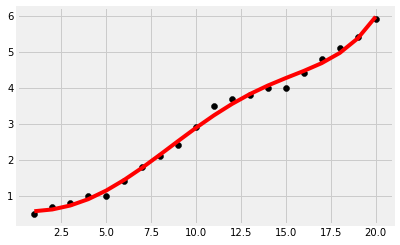

Alpha:  0.001
SSE:  0.27651740078942305
Mean Abs(coefficient):  0.09306068643497746


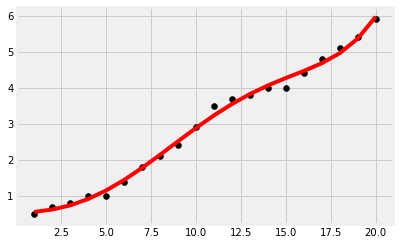

Alpha:  0.01
SSE:  0.28603651038196953
Mean Abs(coefficient):  0.09132895867888213


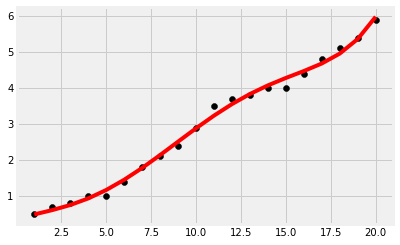

Alpha:  0.25
SSE:  0.45975256505855694
Mean Abs(coefficient):  0.0409182589215583


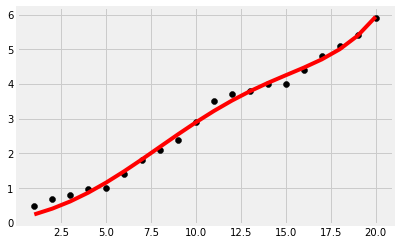

Alpha:  0.5
SSE:  0.5559838183905951
Mean Abs(coefficient):  0.030833522731147252


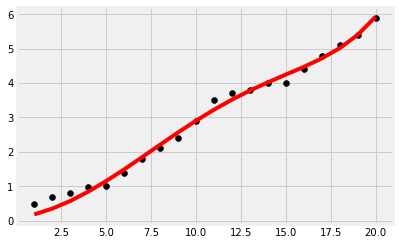

Alpha:  1
SSE:  0.6421710410176367
Mean Abs(coefficient):  0.02358791087603594


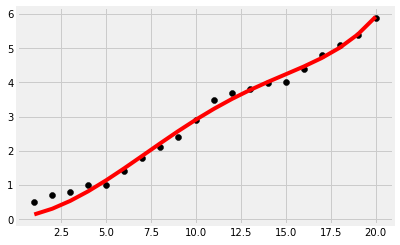

Alpha:  10
SSE:  0.9630610519147634
Mean Abs(coefficient):  0.010267976968739887


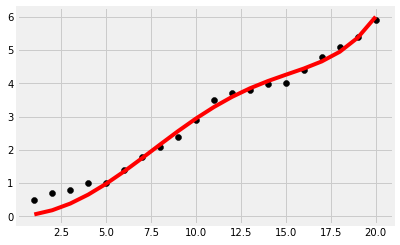

In [49]:
alpha = [0, .001, .01, .25, .5, 1, 10]

for i in alpha:
    #lm = sm.OLS(y, X)
    results = lm.fit_regularized(alpha = i, L1_wt = 0)
    
    y_hat = results.predict(X)
    
    print("Alpha: ", i)
    
    sse = sum(np.square(y_hat - pdf['Y']))
    print("SSE: ", sse) 
    
    print("Mean Abs(coefficient): ", np.mean(abs(results.params)))
    
    fig = plt.figure(figsize=(6,4))
    ax = plt.gca()
    ax.scatter(df['X'], y, c='k')
    ax.plot(df['X'], y_hat, color='r')
    plt.show()

### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [50]:
# SSE increases.

In [51]:
# The coefficient moves toward 0.

In [52]:
# Increasing bias will not always improve the model. We want to find an optimal trade-off between bias and variance.